In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pathlib import Path

import hvplot.pandas
import holoviews as hv
from holoviews import opts
import seaborn as sns

In [3]:
import pandas as pd

# Replace these with the actual file paths of your CSV files
file1_path = '2015.csv'
file2_path = '2016.csv'
file3_path = '2017.csv'
file4_path = '2018.csv'
file5_path = '2019.csv'

# Read the CSV files into pandas DataFrames
Happiness_2015 = pd.read_csv(file1_path)
Happiness_2016 = pd.read_csv(file2_path)
Happiness_2017 = pd.read_csv(file3_path)
Happiness_2018 = pd.read_csv(file4_path)
Happiness_2019 = pd.read_csv(file5_path)

# Happiness 2018 DataFrame

In [4]:
Happiness_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


# Top 10 and Bottom 10 Country Rankings 

In [5]:
df_sorted = Happiness_2018.sort_values(by='Overall rank')
top_10 = df_sorted.head(10)
bottom_10 = df_sorted.tail(10)

In [6]:
top_10 = df_sorted.head(10)
top_10

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
5,6,Netherlands,7.441,1.361,1.488,0.878,0.638,0.333,0.295
6,7,Canada,7.328,1.330,1.532,0.896,0.653,0.321,0.291
7,8,New Zealand,7.324,1.268,1.601,0.876,0.669,0.365,0.389
8,9,Sweden,7.314,1.355,1.501,0.913,0.659,0.285,0.383
9,10,Australia,7.272,1.340,1.573,0.910,0.647,0.361,0.302


# 2018 Scatter plot with regression: GDP per Capita vs Happiness Score

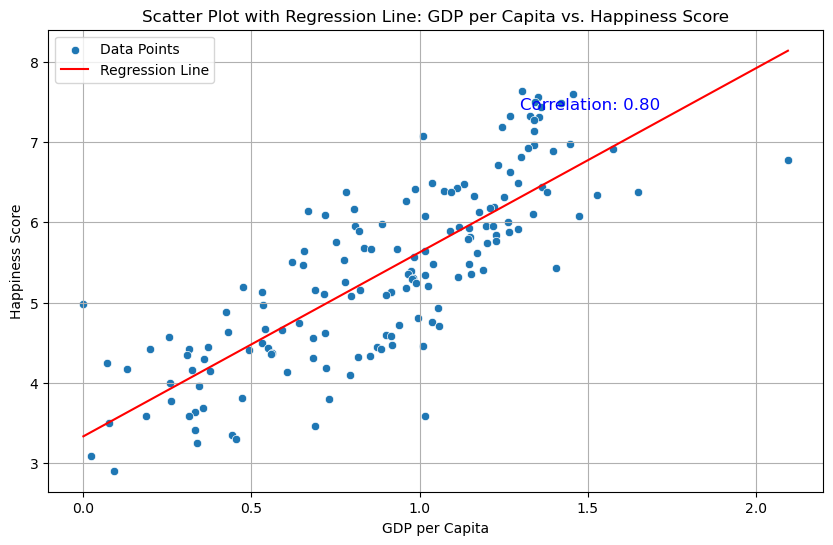

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP per capita', y='Score', data= Happiness_2018, label='Data Points')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress( Happiness_2018['GDP per capita'],  Happiness_2018['Score'])

# Create a regression line
regression_line = slope *  Happiness_2018['GDP per capita'] + intercept

# Plot the regression line
sns.lineplot(x= Happiness_2018['GDP per capita'], y=regression_line, color='red', label='Regression Line')

# Set plot labels and title
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('Scatter Plot with Regression Line: GDP per Capita vs. Happiness Score')

# Display the correlation coefficient on the plot
plt.text(1.3, 7.4, f'Correlation: {r_value:.2f}', fontsize=12, color='blue')

# Show the plot
plt.legend()
plt.grid(True)
plt.show()

# Happiness 2019 DataFrame

In [8]:
Happiness_2019

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [9]:
df_sorted = Happiness_2019.sort_values(by='Overall rank')

# Get the top 10 and bottom 10 rankings
top_10 = df_sorted.head(10)
bottom_10 = df_sorted.tail(10)

# Top 10 Countries (Happiness) 2019

In [10]:
top_10

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


# Top 10 Countries based on GDP per Capita

In [11]:
top_10_countries = Happiness_2019.sort_values(by='GDP per capita', ascending=False).head(10)
top_10_countries

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
28,29,Qatar,6.374,1.684,1.313,0.871,0.555,0.220,0.167
13,14,Luxembourg,7.090,1.609,1.479,1.012,0.526,0.194,0.316
33,34,Singapore,6.262,1.572,1.463,1.141,0.556,0.271,0.453
20,21,United Arab Emirates,6.825,1.503,1.310,0.825,0.598,0.262,0.182
50,51,Kuwait,6.021,1.500,1.319,0.808,0.493,0.142,0.097
15,16,Ireland,7.021,1.499,1.553,0.999,0.516,0.298,0.310
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
75,76,Hong Kong,5.430,1.438,1.277,1.122,0.440,0.258,0.287
18,19,United States,6.892,1.433,1.457,0.874,0.454,0.280,0.128


# Bottom 10 Countries (Happiness)

In [12]:
bottom_10

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
146,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110
147,148,Botswana,3.488,1.041,1.145,0.538,0.455,0.025,0.100
148,149,Syria,3.462,0.619,0.378,0.440,0.013,0.331,0.141
149,150,Malawi,3.410,0.191,0.560,0.495,0.443,0.218,0.089
150,151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


# Bottom 10 Countries based on GDP per Capita

In [13]:
bottom_10_countries = Happiness_2019.sort_values(by='GDP per capita').head(10)
bottom_10_countries

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
111,112,Somalia,4.668,0.000,0.698,0.268,0.559,0.243,0.270
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
144,145,Burundi,3.775,0.046,0.447,0.380,0.220,0.176,0.180
140,141,Liberia,3.975,0.073,0.922,0.443,0.370,0.233,0.033
126,127,Congo (Kinshasa),4.418,0.094,1.125,0.357,0.269,0.212,0.053
113,114,Niger,4.628,0.138,0.774,0.366,0.318,0.188,0.102
149,150,Malawi,3.410,0.191,0.560,0.495,0.443,0.218,0.089
122,123,Mozambique,4.466,0.204,0.986,0.390,0.494,0.197,0.138
128,129,Sierra Leone,4.374,0.268,0.841,0.242,0.309,0.252,0.045
142,143,Madagascar,3.933,0.274,0.916,0.555,0.148,0.169,0.041


# Summary Statistics 

In [14]:
top_10_summary = top_10['GDP per capita'].describe()
top_10_summary

count    10.000000
mean      1.387000
std       0.052113
min       1.303000
25%       1.367750
50%       1.381500
75%       1.393750
max       1.488000
Name: GDP per capita, dtype: float64

In [15]:
bottom_10_summary = bottom_10['GDP per capita'].describe()
bottom_10_summary

count    10.000000
mean      0.397800
std       0.274842
min       0.026000
25%       0.291750
50%       0.336500
75%       0.446750
max       1.041000
Name: GDP per capita, dtype: float64

### The top 10 countries have higher average GDP per capita and less variability, while the bottom 10 countries have a lower average GDP per capita with a wider income disparity.

# Scatter plots: GDP vs [Social Support, Healthy life Exp, Freedom to make life choices, Generosity, Corruption ] 

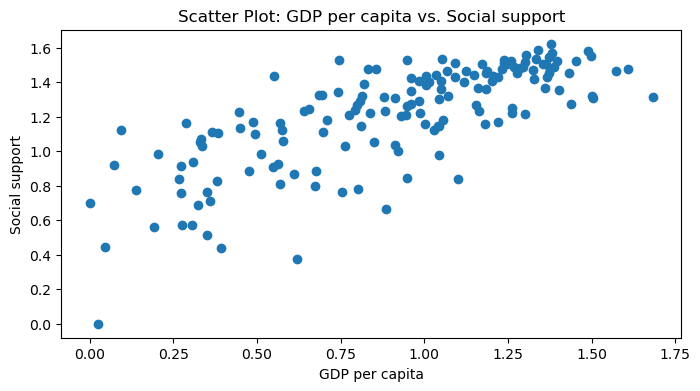

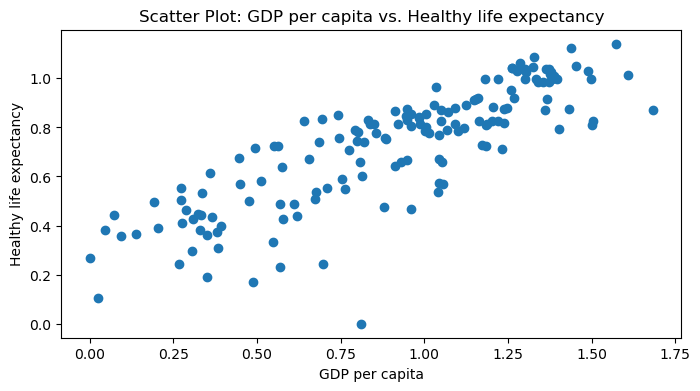

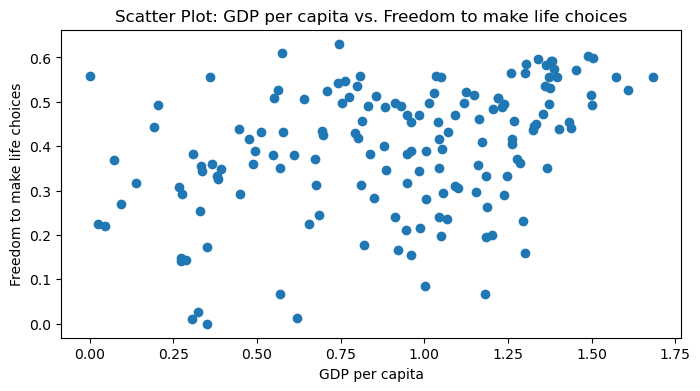

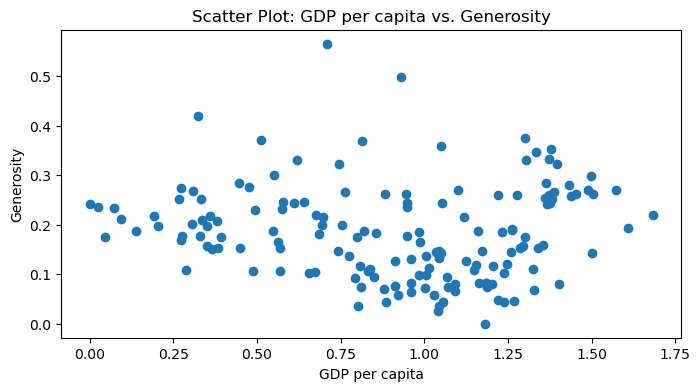

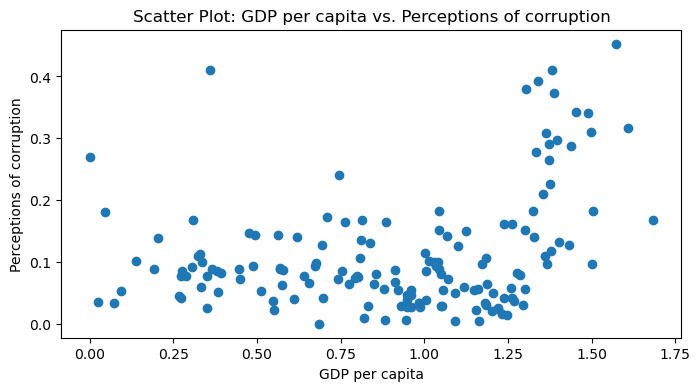

In [17]:
variables = ['Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

for variable in variables:
    plt.figure(figsize=(8, 4))
    plt.scatter(Happiness_2019['GDP per capita'], Happiness_2019[variable])
    plt.xlabel('GDP per capita')
    plt.ylabel(variable)
    plt.title(f'Scatter Plot: GDP per capita vs. {variable}')
    plt.show()

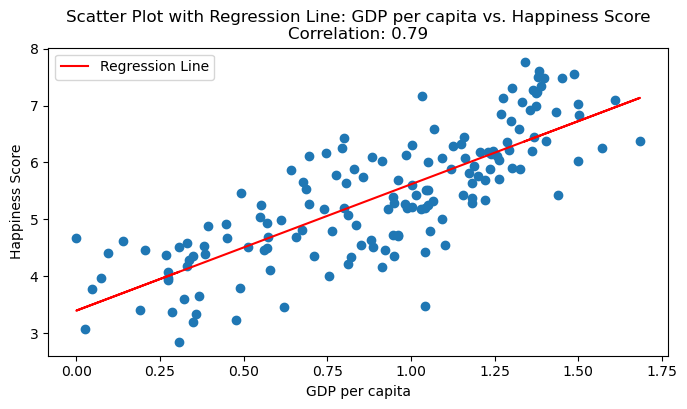

In [18]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(Happiness_2019['GDP per capita'], Happiness_2019['Score'])
regression_line = slope * Happiness_2019['GDP per capita'] + intercept

plt.figure(figsize=(8, 4))
plt.scatter(Happiness_2019['GDP per capita'], Happiness_2019['Score'])
plt.plot(Happiness_2019['GDP per capita'], regression_line, color='red', label='Regression Line')
plt.xlabel('GDP per capita')
plt.ylabel('Happiness Score')
plt.title(f'Scatter Plot with Regression Line: GDP per capita vs. Happiness Score\nCorrelation: {r_value:.2f}')
plt.legend()
plt.show()

# Box Plot: Happiness Score vs. GDP per Capita Range

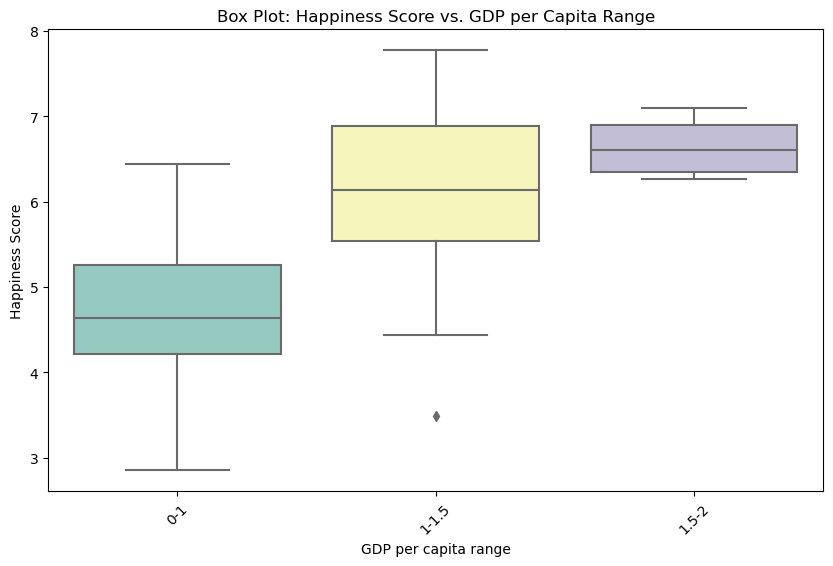

In [19]:
# Create bins for GDP per capita ranges
bins = [0, 1, 1.5, 2]
labels = ['0-1', '1-1.5', '1.5-2']

# Create a new column for GDP per capita ranges
Happiness_2019['GDP per capita range'] = pd.cut(Happiness_2019['GDP per capita'], bins=bins, labels=labels)

# Box plot of Happiness Score for GDP per capita ranges
plt.figure(figsize=(10, 6))
sns.boxplot(x='GDP per capita range', y='Score', data=Happiness_2019, palette='Set3')
plt.xlabel('GDP per capita range')
plt.ylabel('Happiness Score')
plt.title('Box Plot: Happiness Score vs. GDP per Capita Range')
plt.xticks(rotation=45)
plt.show()

# Remove the added column for GDP per capita ranges
Happiness_2019.drop(columns=['GDP per capita range'], inplace=True)


In [22]:
Happiness_2019

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [23]:
from api_key import api_key

In [24]:
Happiness_2019["lat"] = ""
Happiness_2019["lng"] = ""

In [25]:
Happiness_2019

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,lat,lng
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,,
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,,
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,,
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,,
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,,
...,...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,,
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,,
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,,
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,,


In [26]:
top_10

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


# Top 3 countries (Happiness) Map plot

### All within Northen Europe

In [27]:
# Import the required libraries
import hvplot.pandas
import pandas as pd

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [28]:
# Create a dictionary containing coordinates
coordinates = {
    "latitude": [63.2467777, 55.670249, 61.1529386],
    "longitude": [25.9209164, 10.3333283, 8.7876653],
    "City": ["Finland", "Denmark", "Norway"],
    "Population": [5516000, 5794000, 5312000]
}

In [29]:
# Create a Pandas DataFrame containing coordinates
coordinates_df = pd.DataFrame(coordinates)

# Display sample data
coordinates_df

,latitude,longitude,City,Population
0,63.246778,25.920916,Finland,5516000
1,55.670249,10.333328,Denmark,5794000
2,61.152939,8.787665,Norway,5312000


In [30]:
# Configure the map plot_1
map_plot_1 = coordinates_df.hvplot.points(
    "longitude",
    "latitude",
    geo = True,
    tiles = "OSM"
)

# Display the map plot_1
map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]

In [31]:
# Create a dictionary containing coordinates
coordinates = {
    "latitude": [63.2467777, 55.670249, 61.1529386, 7.8699431, 7.0323598, 33.7680065],
    "longitude": [25.9209164, 10.3333283, 8.7876653, 29.6667897, 19.9981227, 66.2385139 ],
    "City": ["Finland", "Denmark", "Norway", "South Sudan", "Central African Republic", "Afghanistan"],
    "Population": [5516000, 5794000, 5312000, 1100000, 460000, 371700000]
}

# Bottom 3 countries (Happiness) Map Plot

In [57]:
# Create a dictionary containing coordinates
coordinates_bottom = {
    "latitude": [7.8699431, 7.0323598, 33.7680065],
    "longitude": [29.6667897, 19.9981227, 66.2385139],
    "City": ["South Sudan", "Central African Republic", "Afghanistan"],
    "Population": [1100000, 460000, 371700000]
}

In [58]:
# Create a Pandas DataFrame containing coordinates
coordinates_bottom = pd.DataFrame(coordinates_bottom)

# Display sample data
coordinates_bottom

,latitude,longitude,City,Population
0,7.869943,29.666790,South Sudan,1100000
1,7.032360,19.998123,Central African Republic,460000
2,33.768006,66.238514,Afghanistan,371700000


In [59]:
# Configure the map plot_1
map_plot_1 = coordinates_bottom.hvplot.points(
    "longitude",
    "latitude",
    geo = True,
    tiles = "OSM"
)

# Display the map plot_1
map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]

In [60]:
# Create a dictionary containing coordinates
coordinates_both = {
    "latitude": [63.2467777, 55.670249, 61.1529386, 7.8699431, 7.0323598, 33.7680065],
    "longitude": [25.9209164, 10.3333283, 8.7876653, 29.6667897, 19.9981227, 66.2385139 ],
    "City": ["Finland", "Denmark", "Norway", "South Sudan", "Central African Republic", "Afghanistan"],
    "Population": [5516000, 5794000, 5312000, 1100000, 460000, 371700000]
}

In [61]:
# Create a Pandas DataFrame containing coordinates
coordinates_BothTopBottom = pd.DataFrame(coordinates_both)

# Display sample data
coordinates_BothTopBottom

,latitude,longitude,City,Population
0,63.246778,25.920916,Finland,5516000
1,55.670249,10.333328,Denmark,5794000
2,61.152939,8.787665,Norway,5312000
3,7.869943,29.666790,South Sudan,1100000
4,7.032360,19.998123,Central African Republic,460000
5,33.768006,66.238514,Afghanistan,371700000


In [62]:
# Configure the map plot_1
map_plot_1 = coordinates_BothTopBottom.hvplot.points(
    "longitude",
    "latitude",
    geo = True,
    tiles = "EsriNatGeo",
    frame_width = 700,
    frame_height = 500,
    size = "Population",
    scale = 0.001,
    color = "City"
)

# Display the map plot
map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (City,Population)

In [63]:

latitude_list = []
longitude_list = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

def get_coordinates(neighborhood):
    url = f"https://api.geoapify.com/v1/geocode/search?text={neighborhood}, London, United Kingdom&filter=circle:-0.0976948320600286,51.54049581786134,70000&apiKey={api_key}"
    response = requests.get(url)
    data2 = response.json()
    if data2['features']:
        location = data2['features'][0]['geometry']['coordinates']
        return location[1], location[0]  # Return latitude and longitude
    else:
        return None, None
# Apply the get_coordinates function to each neighborhood
for neighborhood in neighborhood_stats['neighbourhood']:
    lat, lon = get_coordinates(neighborhood)
    latitude_list.append(lat)
    longitude_list.append(lon)
    print(neighborhood, "Found data"  )
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
# Add latitude and longitude columns to the DataFrame
neighborhood_stats['latitude'] = latitude_list
neighborhood_stats['longitude'] = longitude_list

Beginning Data Retrieval     
-----------------------------


NameError: name 'neighborhood_stats' is not defined